# 1D Gaussian Process Regression using Gpy

## Function definitions: 
$f(x):(6x-2)^2 sin(12x-4)$

### Ref:
1. Forrester Alexander I.J, Sóbester András and Keane Andy J “Multi-fidelity Optimization via Surrogate Modelling”, Proceedings of the Royal Society A, vol. 463, http://doi.org/10.1098/rspa.2007.1900
2. Williams, Christopher KI, and Carl Edward Rasmussen. Gaussian processes for machine learning. Vol. 2. No. 3. Cambridge, MA: MIT press, 2006.
3. https://www.youtube.com/watch?v=4vGiHC35j9s


## Objective: 
1. Find a function based on the given data points, the function must represent the data sety as clæose as possible.
2. The function can be used to perform predictions at other datapoints.
3. Quantify the uncertainty of these predictions

In [1]:
!pip install Gpy

Defaulting to user installation because normal site-packages is not writeable


## Gaussian Process
For the Gaussian process, we need to sample from the multivariate Gaussian distribution that are correlated. This is because we want to fit function for the data and the requirement would be that the points that are closer will have similar values of the function. This is given by the basis functions (kernel) that define the similarity between the two points. Simple example would be if there are two vectors we get the similarity between them using cosine of the angle between them. 

Based on the data we chose the kernel functions. Given the observations we will only retain the functions taht fit these observed data. New observationns will update the belief and build a new posterior with the previous posterior is used as prior now.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,6)
from matplotlib import pyplot as plt
import GPy
import numpy as np

In [3]:

def Forrester_function(x):
    return (6*x-2)**2*np.sin(12*x-4)

Text(0.5, 1.0, 'Forrester function')

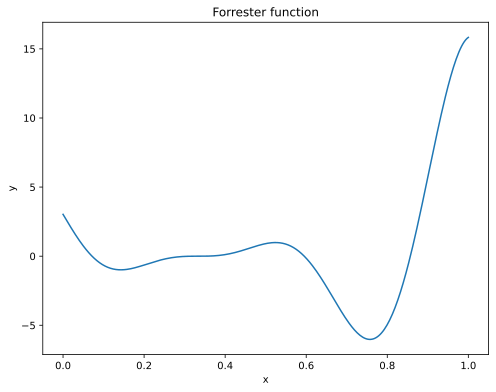

In [4]:
x = np.linspace(0, 1, 300)
plt.plot(x, Forrester_function(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Forrester function')

In [5]:
x_sample=np.linspace(0,1,10)
y_sample= Forrester_function(x_sample)
x_sample = x_sample.reshape(-1, 1)
y_sample = y_sample.reshape(-1, 1)


Text(0.5, 1.0, 'Forrester function')

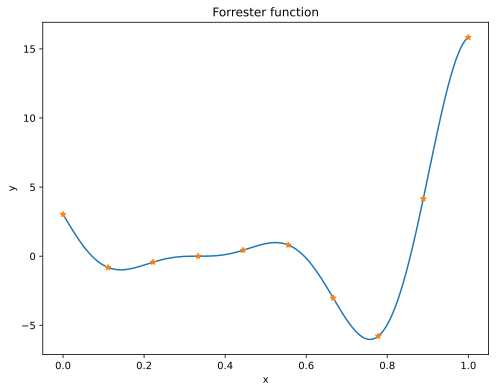

In [6]:
x = np.linspace(0, 1, 300)
plt.plot(x, Forrester_function(x))
plt.plot(x_sample, y_sample,'*')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Forrester function')

In [7]:
kernel = GPy.kern.RBF(input_dim=1, variance=0.1, lengthscale=0.01)

In [8]:
#GPy.kern.BasisFuncKernel?

In [9]:
m = GPy.models.GPRegression(x_sample, y_sample.reshape(-1,1),kernel)

In [10]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,0.1,+ve,
rbf.lengthscale,0.01,+ve,
Gaussian_noise.variance,1.0,+ve,


In [11]:
m.optimize(messages=True)
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 31.538909406727367
Optimization restart 2/10, f = 31.538910931302034
Optimization restart 3/10, f = 31.538919152424675
Optimization restart 4/10, f = 31.538909405114687
Optimization restart 5/10, f = 26.95916858289171
Optimization restart 6/10, f = 31.53891715211326
Optimization restart 7/10, f = 31.538912682159093
Optimization restart 8/10, f = 31.538909404863148
Optimization restart 9/10, f = 31.53891559962731
Optimization restart 10/10, f = 31.538909404927786


GP_regression.,value,constraints,priors
rbf.variance,69.02401819752004,+ve,
rbf.lengthscale,0.1626484093300291,+ve,
Gaussian_noise.variance,1.8842645463092503e-06,+ve,


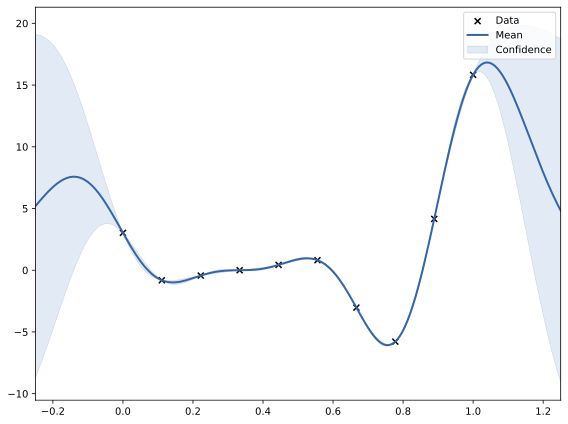

In [12]:
display(m)
fig = m.plot()

In [13]:
y_test_mean,y_test_var=m.predict(x.reshape(-1,1))


 C:\Users\shmads\AppData\Local\Temp\ipykernel_19316\3587530660.py:16: UserWarning:linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.


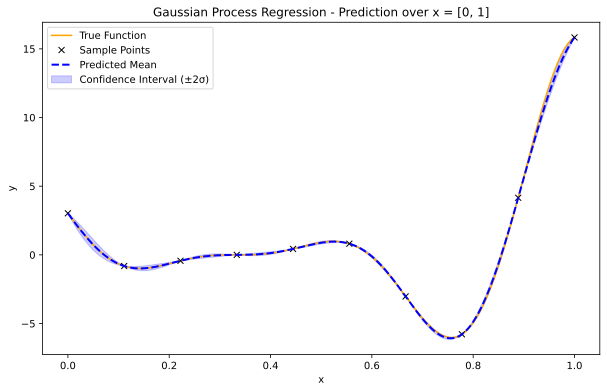

In [14]:
# Flatten all arrays for plotting
x = x.flatten()  # Shape: (300,)
y_test_mean = y_test_mean.flatten()  # Shape: (300,)
std_dev = np.sqrt(y_test_var).flatten()  # Shape: (300,)

# Plot the Forrester function, sample points, and GP predictions
plt.figure(figsize=(10, 6))

# Original function
plt.plot(x, Forrester_function(x), label="True Function", color="orange")

# Sample points
plt.plot(x_sample, y_sample, 'kx', label="Sample Points")

# GP predicted mean
plt.plot(x, y_test_mean, 'b-', linestyle='--', linewidth=2, label="Predicted Mean")

# Fill the confidence interval (mean ± 2 * std_dev)
plt.fill_between(
    x,
    y_test_mean - 2 * std_dev,
    y_test_mean + 2 * std_dev,
    color="blue",
    alpha=0.2,
    label="Confidence Interval (±2σ)"
)

# Labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Gaussian Process Regression - Prediction over x = [0, 1]")
plt.show()